Here we will develop a Machine Lrarning model to predict weather a student will get placed on the College Placements based on the student's IQ and CGPA.

Now import the necessary python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now read the dataset into some variable.

In [2]:
dataset = pd.read_csv('placement.csv')

In [3]:
dataset.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
dataset.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [5]:
dataset.shape

(100, 4)

Now observe how many members have placed in their College Placements.

In [6]:
dataset['placement'].value_counts()

placement
1    50
0    50
Name: count, dtype: int64

<Axes: xlabel='placement'>

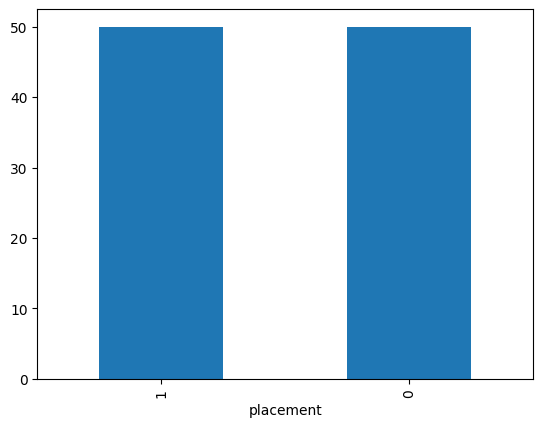

In [8]:
dataset['placement'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

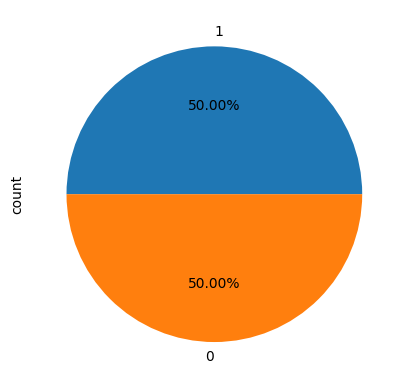

In [10]:
dataset['placement'].value_counts().plot(kind='pie',autopct='%1.2f%%')

The observations from the College Placements data are Half of the students have placed and the remaining Half of the students have not placed in their placements.

Now observe the CGPA data saperately to understand it.

In [11]:
dataset['cgpa'].value_counts()

cgpa
4.9    6
5.2    5
6.1    5
7.0    5
6.0    5
6.8    4
7.3    4
6.5    4
5.7    4
4.8    4
5.4    4
6.3    3
7.5    3
4.7    3
5.0    3
6.9    3
5.1    3
6.4    2
5.3    2
5.8    2
6.7    2
7.1    2
8.1    2
4.4    2
7.6    2
6.6    2
4.0    2
8.0    1
4.3    1
8.5    1
7.4    1
4.6    1
7.8    1
8.3    1
3.5    1
3.3    1
3.9    1
5.9    1
6.2    1
Name: count, dtype: int64

<Axes: xlabel='cgpa'>

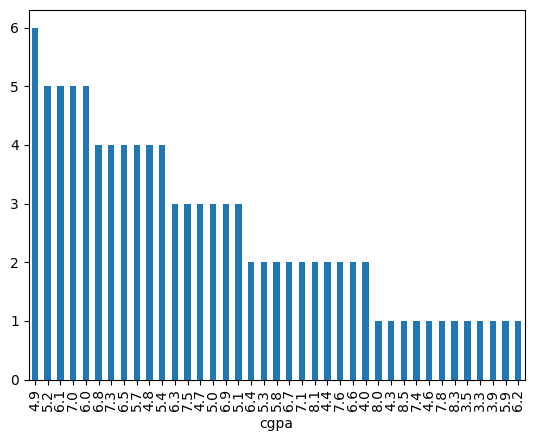

In [12]:
dataset['cgpa'].value_counts().plot(kind='bar')

Now understand the IQ data.

In [13]:
dataset['iq'].value_counts()

iq
132.0    4
114.0    3
141.0    3
112.0    3
90.0     3
        ..
106.0    1
89.0     1
161.0    1
135.0    1
113.0    1
Name: count, Length: 71, dtype: int64

<Axes: xlabel='iq'>

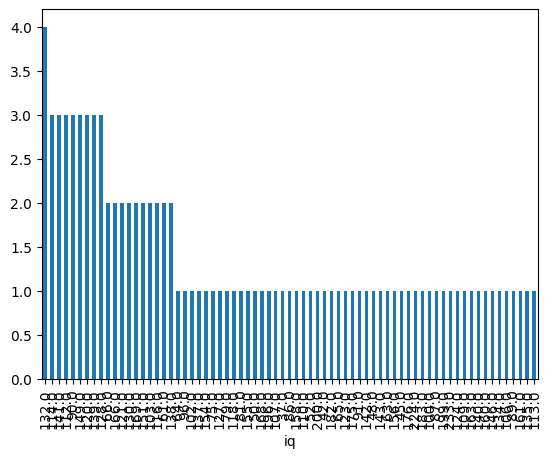

In [14]:
dataset['iq'].value_counts().plot(kind='bar')

Now we will perform some bivariate analysis to understand more about the data given.


Now check the relation between the cgpa and placement.

In [17]:
pd.crosstab(dataset['cgpa'],dataset['placement'],normalize='columns')*100

placement,0,1
cgpa,,
3.3,2.0,0.0
3.5,2.0,0.0
3.9,2.0,0.0
4.0,4.0,0.0
4.3,2.0,0.0
4.4,4.0,0.0
4.6,2.0,0.0
4.7,6.0,0.0
4.8,8.0,0.0


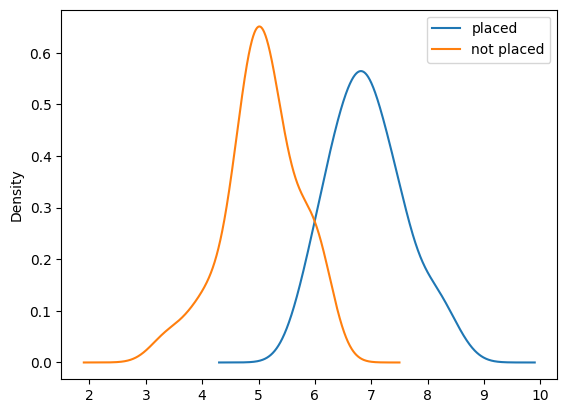

In [20]:
dataset[dataset['placement']==1]['cgpa'].plot(kind='kde',label='placed')
dataset[dataset['placement']==0]['cgpa'].plot(kind='kde',label='not placed')
plt.legend()
plt.show()

Similarly in the above case we also analyse the data relation between the iq and placement.

In [21]:
pd.crosstab(dataset['iq'],dataset['placement'],normalize='columns')*100

placement,0,1
iq,,
37.0,0.0,2.0
42.0,2.0,0.0
45.0,0.0,2.0
48.0,0.0,2.0
50.0,0.0,2.0
...,...,...
196.0,2.0,0.0
199.0,0.0,2.0
200.0,2.0,0.0


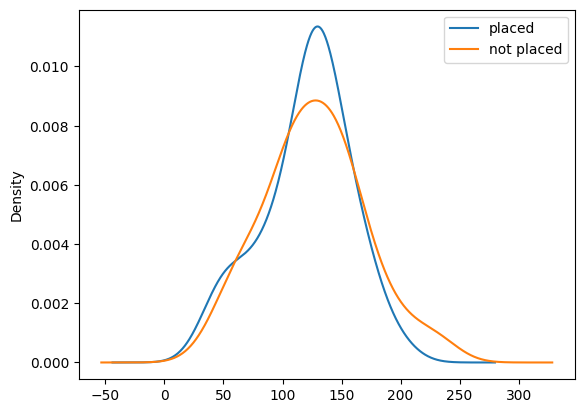

In [24]:
dataset[dataset['placement']==1]['iq'].plot(kind='kde',label='placed')
dataset[dataset['placement']==0]['iq'].plot(kind='kde',label='not placed')
plt.legend()
plt.show()

Upto now we do have done the Exploratory Data Analysis part. Now we will perform the Feature Engineering part here.

Check for any missing values in the dataset. If there were any missig values, then we need to perform the feature engineering part.

In [25]:
dataset.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

Here we can clearly observe that there were no missing values. So we need not to do any type of feaure engineering process.

In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


- Numerical Data types : cgpa, iq
- Categorical Data types : placement

In [27]:
dataset.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

From the dataset we have four columns and from there Unnamed coulmn is out of use for the developing the machine learning model. So we will remove the column.

In [28]:
dataset = dataset.drop('Unnamed: 0', axis=1)

In [29]:
dataset.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


Now our dataset is completely good enough to apply a machine learning algorithum.

From the above all observations we can clearly notice that, this is a Regression problem.
Here we have the input columns like cgpa and iq. From there we need to find that if that student has got placed or not.

So we will apply Logistic Regression for the above dataset to develop a machine learning model.

Before that we have to perform the train test split for the dataset

In [30]:
x=dataset.drop('placement',axis=1)
y=dataset['placement']

In [32]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [33]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [35]:
Y=dataset.iloc[:,-1]

In [36]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [37]:
X=dataset.iloc[:,:2]

In [38]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [45]:
x_train

,cgpa,iq
26,7.0,199.0
65,8.1,166.0
91,7.5,158.0
64,7.0,64.0
40,4.9,134.0
...,...,...
80,4.9,196.0
21,7.1,151.0
99,6.2,113.0
83,7.5,130.0


In [46]:
x_test

,cgpa,iq
94,4.7,52.0
6,5.7,143.0
61,7.3,137.0
9,5.1,66.0
63,6.3,128.0
12,5.4,139.0
46,5.3,114.0
0,6.8,123.0
38,6.5,160.0
90,7.3,86.0


In [47]:
y_train

26    1
65    1
91    1
64    1
40    0
     ..
80    0
21    1
99    1
83    1
5     1
Name: placement, Length: 90, dtype: int64

In [48]:
y_test

94    0
6     0
61    1
9     0
63    1
12    0
46    0
0     1
38    1
90    1
Name: placement, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [50]:
x_train

array([[ 0.87248022,  1.8496618 ],
       [ 1.8185431 ,  1.02973709],
       [ 1.3025088 ,  0.83096747],
       [ 0.87248022, -1.50457565],
       [-0.93363984,  0.23465859],
       [-0.7616284 ,  0.08558137],
       [ 0.09842876,  0.78127506],
       [ 0.01242305, -1.97665351],
       [ 0.35644591,  0.40858201],
       [ 1.13049737, -0.21257307],
       [ 0.61446307,  1.42727635],
       [-1.70769129, -1.23126741],
       [-0.84763412, -1.52942185],
       [-1.01964555,  0.95519848],
       [-0.15958839,  1.02973709],
       [ 0.09842876, -0.53557372],
       [ 0.44245163,  0.13527377],
       [ 0.52845735, -0.11318826],
       [-0.93363984, -0.11318826],
       [ 1.13049737, -1.85242249],
       [ 0.87248022,  0.3588896 ],
       [-0.67562269,  0.18496618],
       [-0.2455941 ,  0.18496618],
       [ 0.52845735,  0.3340434 ],
       [ 0.7864745 ,  0.3340434 ],
       [ 1.8185431 ,  0.60735164],
       [-1.36366842,  0.60735164],
       [ 0.01242305, -1.45488324],
       [ 1.73253738,

In [51]:
x_test

array([[-1.51880978, -1.86706412],
       [-0.38536965,  0.83839504],
       [ 1.42813457,  0.66001311],
       [-1.06543373, -1.45083964],
       [ 0.29469443,  0.39244023],
       [-0.72540169,  0.71947375],
       [-0.8387457 , -0.02378426],
       [ 0.8614145 ,  0.24378863],
       [ 0.52138246,  1.34381048],
       [ 1.42813457, -0.85623323]])

Now we will apply the Logiestic Regression for the above dataset.

In [53]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

We have sucessfully applied the Logistic Regression to the above train dataset and now we need to check if it is working properly or not.

Now we will predict the output for the test data to check if it is correct or not.

In [66]:
y_predict=clf.predict(x_test)

In [60]:
y_predict

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [61]:
np.array(y_test)

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

From the outputs of the above two code blocks we can observe that the outputs are same. Hence we have developed a Machine Learning Model for the given dataset.

Lets check the accuracy of the model.

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

1.0

The accuracy of the Machine Learning Model is 100% .